In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./dataset/adult.csv', delimiter=",")

In [24]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,relationship_num,race_num,sex_num,occupation_num,marital-status_num,workclass_num,native-country_num,label_num
0,39,77516,13,2174,0,40,1,4,1,1,4,7,39,0
1,50,83311,13,0,0,13,0,4,1,4,2,6,39,0
2,38,215646,9,0,0,40,1,4,1,6,0,4,39,0
3,53,234721,7,0,0,40,0,2,1,6,2,4,39,0
4,28,338409,13,0,0,40,5,2,0,10,2,4,5,0


In [25]:
#to classify, we first need to split the dataset into train and test dataset.
#we can do so using train_test_split, in this case we select a stratified split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

label = df.pop('label_num')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.30)

In [26]:
#define a decision tree and fit it
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=10, 
                                  min_samples_split=3, min_samples_leaf=4)
dt = dt.fit(train_set, train_label)

In [38]:
#visualize the actual decision tree obtained 
import pydotplus 
from IPython.display import Image, display



dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(train_set.columns),  
                         class_names=['<=50', '>50'],  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=800, height=500)


AttributeError: 'Image' object has no attribute 'show'

In [28]:
#predict using the decision tree
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

In [29]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
from sklearn import metrics
print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_dt))
print('Precision train set ', metrics.precision_score(train_label, train_pred_dt, average='weighted'))
print('Recall train set ', metrics.recall_score(train_label, train_pred_dt, average='weighted'))
print('F1 score train set ', metrics.f1_score(train_label, train_pred_dt, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred_dt))

Accuracy train set  0.8688574938574939
Accuracy test set  0.8496263691268298
Precision train set  0.8642519384122002
Recall train set  0.8688574938574939
F1 score train set  0.8650251124256145
Support train set  (array([0.89467299, 0.76835552]), array([0.93764087, 0.65203134]), array([0.91565313, 0.70543018]), array([17303,  5489], dtype=int64))


In [30]:
#metrics computed on the test set
from sklearn.metrics import classification_report
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['<=50', '>50']))

In [31]:
report_scores(test_label, test_pred_dt)

              precision    recall  f1-score   support

        <=50       0.89      0.92      0.90      7417
         >50       0.71      0.63      0.67      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.84      0.85      0.85      9769



In [32]:
#cross validation
#the score array for test/train scores on each cv split
#the time for fitting/scoring the estimator on the train set for each cv split
from sklearn.model_selection import cross_validate
import statistics 
scores = cross_validate(dt, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.04504060745239258
Score time  0.002669811248779297
Test score  0.8530625506443187
Train score  0.8726307710901567


In [33]:
#compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, test_pred_dt)
cm

array([[6827,  590],
       [ 879, 1473]], dtype=int64)

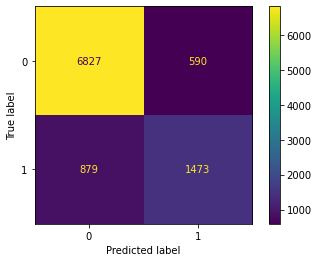

In [34]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(dt, test_set, test_label)
plt.show() 

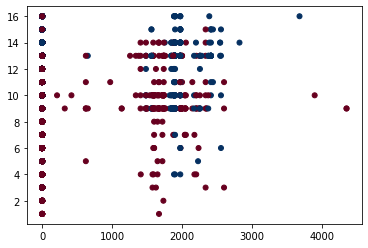

In [35]:
from sklearn.datasets import make_blobs
plt.scatter(test_set.iloc[:, 4].values, test_set.iloc[:, 2].values, c=test_label.values, s=25, cmap='RdBu');

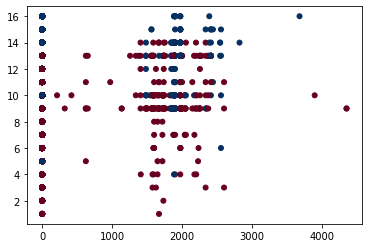

In [36]:
plt.scatter(test_set.iloc[:, 4].values, test_set.iloc[:, 2].values, c=test_pred_dt, s=25, cmap='RdBu');